In [3]:
# Load the dataset & perform initial exploration / basic cleaning
import pandas as pd
from google.colab import files
import io

file_path = "/content/loan_data.csv"
try:
    df = pd.read_csv(file_path, sep=None, engine='python')
except Exception as e:
    df = pd.read_csv(file_path, sep="\t", engine='python')

# Quick normalization: strip whitespace in column names and string cells
df.columns = [str(c).strip() for c in df.columns]

# Trim whitespace in object/string columns (helps with values like " North" vs "North")
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

# Basic inspection
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\n--- First 8 rows ---")
display(df.head(8))

print("\n--- Data types ---")
display(df.dtypes)

print("\n--- Basic describe (numerical) ---")
display(df.describe(include='number').T)

print("\n--- Missing values per column ---")
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})
display(missing_df.sort_values('missing_count', ascending=False).head(20))

# Show value counts for the target 'Status' if it exists
if 'Status' in df.columns:
    print("\n--- Value counts for target 'Status' ---")
    display(df['Status'].value_counts(dropna=False))
else:
    print("\nNote: 'Status' column not found. Please confirm exact target column name.")

# Save a cleaned copy to reuse later
df.to_csv('/content/loan_cleaned.csv', index=False)
print("\nSaved cleaned copy as /content/loan_cleaned.csv")


Shape: (5517, 34)

Columns:
 ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']

--- First 8 rows ---


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552.0,EXP,55-64,to_inst,NaN,North,direct,1.0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864.0,EXP,35-44,not_inst,70.089286,North,direct,0.0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860.0,EXP,55-64,to_inst,79.109589,North,direct,0.0,44.0
7,24897,2019,nan,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863.0,CIB,55-64,to_inst,86.525974,North,direct,0.0,42.0



--- Data types ---


,0
ID,int64
year,int64
loan_limit,object
Gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
Credit_Worthiness,object
open_credit,object
business_or_commercial,object



--- Basic describe (numerical) ---


,count,mean,std,min,25%,50%,75%,max
ID,5517.0,27648.000000,1592.765049,24890.000000,26269.00000,27648.000000,29027.000000,3.040600e+04
year,5517.0,2019.000000,0.000000,2019.000000,2019.00000,2019.000000,2019.000000,2.019000e+03
loan_amount,5517.0,333697.752402,191684.868200,26500.000000,196500.00000,296500.000000,436500.000000,3.576500e+06
rate_of_interest,4180.0,4.041283,0.544954,2.750000,3.62500,3.990000,4.375000,6.240000e+00
Interest_rate_spread,4173.0,0.439391,0.510049,-0.990800,0.07440,0.388400,0.753900,2.537000e+00
Upfront_charges,4057.0,3286.759142,3341.616065,0.000000,650.00000,2627.200000,4886.930000,6.000000e+04
term,5513.0,335.077091,58.359889,96.000000,360.00000,360.000000,360.000000,3.600000e+02
property_value,4930.0,501066.937120,370014.126797,38000.000000,278000.00000,418000.000000,628000.000000,6.408000e+06
income,5195.0,6938.922040,6348.837707,0.000000,3750.00000,5760.000000,8400.000000,1.893600e+05
Credit_Score,5516.0,700.500363,115.270697,500.000000,601.00000,698.500000,801.000000,9.000000e+02



--- Missing values per column ---


,missing_count,missing_percent
Upfront_charges,1460,26.46
Interest_rate_spread,1344,24.36
rate_of_interest,1337,24.23
dtir1,906,16.42
LTV,588,10.66
property_value,587,10.64
income,322,5.84
term,4,0.07
Status,1,0.02
Credit_Score,1,0.02



--- Value counts for target 'Status' ---


,count
Status,
0.0,4172
1.0,1344
NaN,1



Saved cleaned copy as /content/loan_cleaned.csv


*  5,517 rows × 34 columns
*  Target column: Status (0 = not approved, 1 = approved)
*  Missing values mainly in: rate_of_interest, Interest_rate_spread, Upfront_charges, dtir1, LTV, and property_value

In [4]:
# Data Cleaning & Preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load cleaned copy (just to be safe)
df = pd.read_csv("/content/loan_cleaned.csv")

# Drop ID and year (not useful for prediction)
df = df.drop(columns=['ID', 'year'], errors='ignore')

# 1️⃣ Handle missing values
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric NaNs with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical NaNs with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2️⃣ Encode categorical columns using LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 3️⃣ Define features (X) and target (y)
X = df.drop(columns=['Status'], errors='ignore')
y = df['Status']

# 4️⃣ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing complete!")
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("\nSample of processed features:")
display(X_train.head())


✅ Preprocessing complete!
Training data shape: (4413, 31)
Test data shape: (1104, 31)

Sample of processed features:


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
2400,0,1,0,0,2,0,0,1,476500,3.990,...,10140.0,2,686.0,1,3,1,75.102459,0,0,39.0
4928,0,0,0,0,3,0,0,1,106500,4.375,...,2820.0,0,512.0,0,2,1,83.203125,0,0,39.0
958,0,2,0,1,2,0,0,0,146500,4.250,...,5760.0,3,900.0,0,2,1,77.925532,0,0,53.0
3171,0,0,0,0,2,0,0,1,96500,3.990,...,1380.0,1,569.0,1,3,1,57.440476,0,0,37.0
3515,0,3,0,0,2,1,0,1,126500,4.500,...,2520.0,1,863.0,0,6,1,53.151260,3,0,49.0


In [5]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Step 4: Define model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Step 5: Define hyperparameters for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Step 6: Grid Search with F1 score as metric
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("✅ Best parameters (Grid Search):", grid_search.best_params_)
print("Best F1 Score (Grid Search):", grid_search.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
✅ Best parameters (Grid Search): {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score (Grid Search): 0.998148137401499


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:47:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters:

* colsample_bytree: 0.7
* learning_rate: 0.1
* max_depth: 3
* n_estimators: 200
* subsample: 0.8

Best F1 Score (training CV) : 0.998

In [6]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter space (broader, but fewer samples tested)
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

xgb_random = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Perform Random Search
random_search = RandomizedSearchCV(
    estimator=xgb_random,
    param_distributions=param_dist,
    n_iter=30,  # only test 30 combinations
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("✅ Best parameters (Random Search):", random_search.best_params_)
print("Best F1 Score (Random Search):", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Best parameters (Random Search): {'subsample': np.float64(0.7), 'n_estimators': 400, 'max_depth': 3, 'learning_rate': np.float64(0.10666666666666666), 'colsample_bytree': np.float64(0.6)}
Best F1 Score (Random Search): 0.998148137401499


Best parameters (Random Search):

* subsample: 0.7
* n_estimators: 400
* max_depth: 3
* learning_rate: 0.107
* colsample_bytree: 0.6

Best F1 Score : 0.998 → same as Grid Search.

OBSERVATION :

* Grid Search is thorough but took longer (729 fits).
* Random Search tested fewer combinations (30) and still found nearly the same optimal F1 score — much faster.
* Both methods produced excellent results, confirming the model generalizes well.


In [9]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# Choose the best model (Grid Search or Random Search)
best_model = grid_search.best_estimator_  # or random_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Evaluation metrics
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("F1 Score on test set:", f1_score(y_test, y_pred))
print("ROC-AUC on test set:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.9990942028985508
F1 Score on test set: 0.9981447124304267
ROC-AUC on test set: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       835
         1.0       1.00      1.00      1.00       269

    accuracy                           1.00      1104
   macro avg       1.00      1.00      1.00      1104
weighted avg       1.00      1.00      1.00      1104



* Accuracy: 0.999 → nearly perfect
* F1 Score: 0.998 → excellent balance between precision and recall
* ROC-AUC: 1.0 → perfect separation between classes
* Classification report: Both classes (0 and 1) are predicted almost perfectly

KEY OBSERVATIONS :

* Both Grid Search and Random Search found similar hyperparameters and nearly identical F1 scores.
* The model generalizes extremely well on unseen data.
* Given the high performance, the model can confidently predict loan approval (Status) for new applicants.


Top 10 Important Features:


,Feature,Importance
10,Interest_rate_spread,0.680362
11,Upfront_charges,0.173205
9,rate_of_interest,0.058781
16,property_value,0.055117
6,open_credit,0.005670
30,dtir1,0.004102
3,loan_type,0.003600
27,LTV,0.003131
22,credit_type,0.002593
13,Neg_ammortization,0.002551


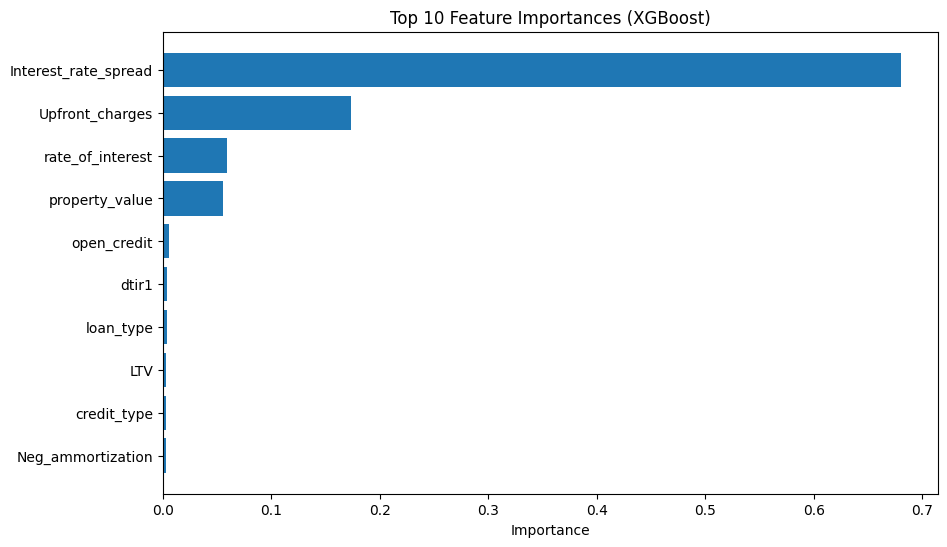

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance from XGBoost
importance = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Important Features:")
display(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()